## Lets Grow More

**DATA SCIENCE INTERSHIP LGMVIP(MAY-2022)**

**AUTHOR**: Jenin Johna

**PROBLEM STATEMENT**: Predict the price of a stock

<ol>
<li>Loading the Dataset.</li>
<li>Preprocessing of Data.</li>
<li>Create a Stacked LSTM Model.</li>
<li>Predict the test data and plot the outpot.</li>
<li>Predict the stock price for future 30 days.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the data
df=pd.read_csv('NSE-TATAGLOBAL.CSV')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
df1=df.iloc[::-1]
df1=df1.reset_index()['Close']
df1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

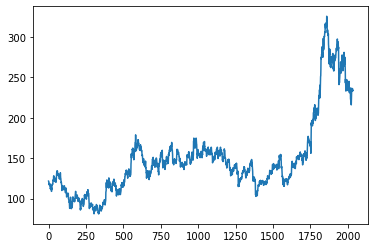

In [4]:
plt.plot(df1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [6]:
#test and train splitting of data
length=len(df)
training_size= int(length*0.70)
test_size= length- training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:length,:1]

In [7]:
print(training_size,test_size)

1424 611


In [8]:
def dataset(dataset, time_step=1):
	dataX, dataY = [], []

	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a) # if steps = 100 then, 0-99 here 
		dataY.append(dataset[i + time_step, 0]) # 100th element here as label
  
	return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100 # taking previous 100 elements in consideration.

X_train, y_train = dataset(train_data, time_step)
X_test, ytest = dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [11]:
# reshape input to be [samples, time steps, features] which is required for LSTM as (X_train.shape[1],1) will be given as input to LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Creating an Stacked LSTM Model


In [12]:
# Importing the necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
# defining the sequential model

model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 1323 samples, validate on 510 samples
Epoch 1/100
1323/1323 [==============================] - 8s 6ms/sample - loss: 0.0083 - val_loss: 0.0131
Epoch 2/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 0.0017 - val_loss: 0.0069
Epoch 3/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 9.4211e-04 - val_loss: 0.0030
Epoch 4/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 8.6822e-04 - val_loss: 0.0055
Epoch 5/100
1323/1323 [==============================] - 3s 2ms/sample - loss: 8.2485e-04 - val_loss: 0.0044
Epoch 6/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 7.8375e-04 - val_loss: 0.0037
Epoch 7/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 7.4900e-04 - val_loss: 0.0048
Epoch 8/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 7.2244e-04 - val_loss: 0.0040
Epoch 9/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 6.8876e-04

1323/1323 [==============================] - 2s 2ms/sample - loss: 1.7419e-04 - val_loss: 0.0010
Epoch 75/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 1.6139e-04 - val_loss: 7.5609e-04
Epoch 76/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 1.7724e-04 - val_loss: 0.0018
Epoch 77/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 1.5302e-04 - val_loss: 0.0015
Epoch 78/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 1.4767e-04 - val_loss: 7.6968e-04
Epoch 79/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 1.5505e-04 - val_loss: 0.0015
Epoch 80/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 1.5760e-04 - val_loss: 5.4072e-04
Epoch 81/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 1.6263e-04 - val_loss: 0.0011
Epoch 82/100
1323/1323 [==============================] - 2s 2ms/sample - loss: 1.4252e-04 - val_loss: 0.0018
Epoch 83/10

## Predict the test data and plot the output

In [16]:
# Lets Do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [17]:
# Transforming the results back to original scale

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [18]:
# Computing the RSME matrices

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

135.32944182758465

In [19]:
math.sqrt(mean_squared_error(ytest,test_predict))

210.70779988358444

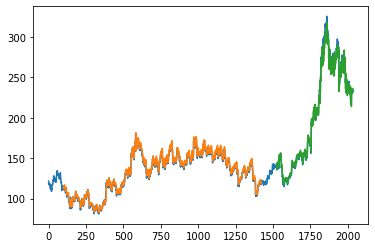

In [21]:
# Plotting the results

# shift train predictions for plotting
look_back=100 #timestamp
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plotting the train_predict and test_predict on the same plot as true data.
plt.plot(scaler.inverse_transform(df1)) # to scale the data back to original scale.
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In the plot shown above, the blue represents the actual data, whereas the orange part represents the training data, and green represents the predicted output for the test data.

## Predict the stock price for the future 30 days

In [23]:
len(test_data)


611

In [25]:
# Now as we would want to consider the previous 100 values for the prediction we will substract 100 from len(test_data)

x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.62128675]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

11 day output [[0.58454096]]
12 day input [0.70894608 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951
 0.74468954 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392
 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765
 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791
 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333
 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523
 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951
 0.66319444 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098
 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013
 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882
 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634
 0.62254902 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908
 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987
 0.625      0.63582516 0.62949346 0.62888072 0.62765523 0.62234477
 0.63378268 0.62622549 

22 day output [[0.57210463]]
23 day input [0.75980392 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575
 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575
 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771
 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608
 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301 0.62128675
 0.6138345  0.60624313 0.60150105 0.59885263 0.59659237 0.59402519
 0.59143478 0.589229

In [28]:
# for plotting the results 

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

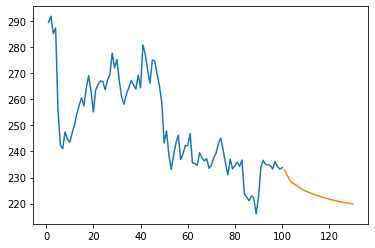

In [30]:
len(df)
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

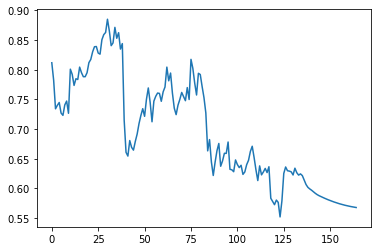

In [32]:
# to get better visualization: -

df_b=df1.tolist()
df_b.extend(lst_output)
plt.plot(df_b[1900:])